In [35]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [2]:
#reading the data
df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [3]:
#setting index as id
df_train= df_train.set_index('id')
df_test= df_test.set_index('id')

In [4]:
#viewing first five rows of the dataset
df_train.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [5]:
#viewing first few rows of test dataset
df_test.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
id,,,,,,,,,,,,
517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [6]:
#number of columns and data types in the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517754 entries, 0 to 517753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               517754 non-null  object 
 1   num_lanes               517754 non-null  int64  
 2   curvature               517754 non-null  float64
 3   speed_limit             517754 non-null  int64  
 4   lighting                517754 non-null  object 
 5   weather                 517754 non-null  object 
 6   road_signs_present      517754 non-null  bool   
 7   public_road             517754 non-null  bool   
 8   time_of_day             517754 non-null  object 
 9   holiday                 517754 non-null  bool   
 10  school_season           517754 non-null  bool   
 11  num_reported_accidents  517754 non-null  int64  
 12  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(2), int64(3), object(4)
memory usage: 41.5+ MB


In [7]:
#number of columns and data types in the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172585 entries, 517754 to 690338
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               172585 non-null  object 
 1   num_lanes               172585 non-null  int64  
 2   curvature               172585 non-null  float64
 3   speed_limit             172585 non-null  int64  
 4   lighting                172585 non-null  object 
 5   weather                 172585 non-null  object 
 6   road_signs_present      172585 non-null  bool   
 7   public_road             172585 non-null  bool   
 8   time_of_day             172585 non-null  object 
 9   holiday                 172585 non-null  bool   
 10  school_season           172585 non-null  bool   
 11  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(3), object(4)
memory usage: 12.5+ MB


In [8]:
#summary statistics of numerical columns in train dataset
df_train.describe()

,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,2.491511,0.488719,46.112575,1.187970,0.352377
std,1.120434,0.272563,15.788521,0.895961,0.166417
min,1.000000,0.000000,25.000000,0.000000,0.000000
25%,1.000000,0.260000,35.000000,1.000000,0.230000
50%,2.000000,0.510000,45.000000,1.000000,0.340000
75%,3.000000,0.710000,60.000000,2.000000,0.460000
max,4.000000,1.000000,70.000000,7.000000,1.000000


In [9]:
#number of unique values in the columns
df_train.nunique()

road_type                   3
num_lanes                   4
curvature                 261
speed_limit                 5
lighting                    3
weather                     3
road_signs_present          2
public_road                 2
time_of_day                 3
holiday                     2
school_season               2
num_reported_accidents      8
accident_risk              98
dtype: int64

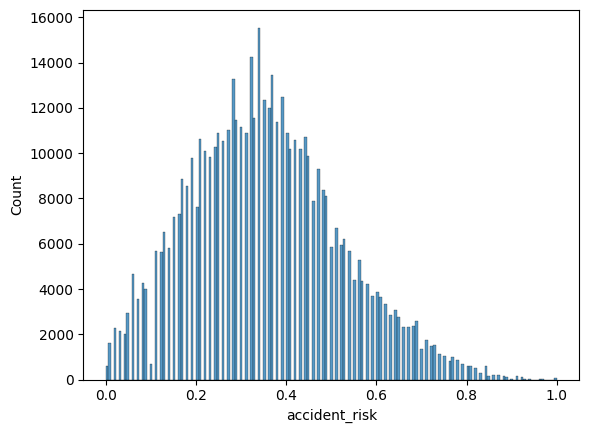

In [10]:
#plotting histogram for target variable in train dataset
sns.histplot(data= df_train, x='accident_risk')
plt.show()

The distribution is skewed towards the right. We apply log transformation to fix this.

In [11]:
df_train['accident_risk']= np.log1p(df_train['accident_risk'])

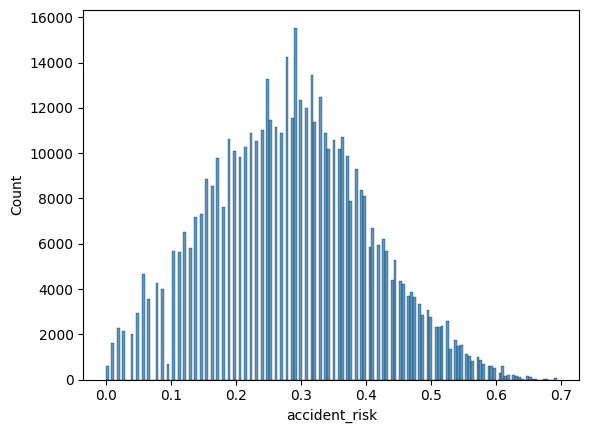

In [12]:
#plotting histogram for target variable in train dataset after the fix
sns.histplot(data= df_train, x='accident_risk')
plt.show()

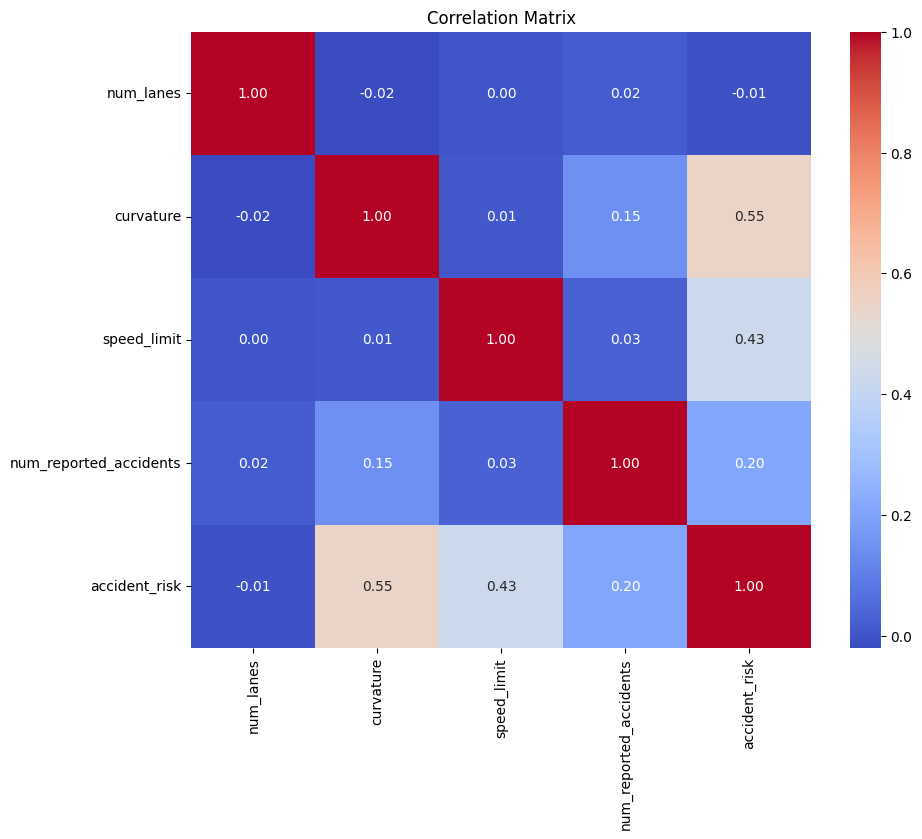

In [16]:
#viewing correlation between numerical variables
numerical_variables= df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_matrix= df_train[numerical_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [15]:
#categorical variables in the dataset
categorical_variables= df_train.select_dtypes(include=['object']).columns.tolist()
categorical_variables

['road_type', 'lighting', 'weather', 'time_of_day']

In [17]:
#Encoding categorical variables using one-hot encoding
df_train= pd.get_dummies(df_train, columns=categorical_variables, drop_first=True)
df_test= pd.get_dummies(df_test, columns=categorical_variables, drop_first=True)


In [19]:
df_train.head()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
id,,,,,,,,,,,,,,,,,
0,2,0.06,35,False,True,False,True,1,0.122218,False,True,False,False,False,True,False,False
1,4,0.99,35,True,False,True,True,0,0.300105,False,True,False,False,False,False,True,False
2,4,0.63,70,False,True,True,False,2,0.262364,True,False,True,False,False,False,False,True
3,4,0.07,35,True,True,False,False,1,0.190620,False,False,True,False,False,True,False,True
4,1,0.58,60,False,False,True,False,1,0.444686,True,False,False,False,True,False,True,False


In [20]:
df_test.head()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
id,,,,,,,,,,,,,,,,
517754,2,0.34,45,True,True,True,True,1,False,False,False,True,False,False,False,False
517755,3,0.04,45,True,False,True,False,0,False,True,True,False,True,False,False,False
517756,2,0.59,35,True,False,True,True,1,False,True,True,False,False,False,False,False
517757,4,0.95,35,False,False,False,False,2,True,False,False,False,False,True,False,False
517758,2,0.86,35,True,False,False,True,3,False,False,False,False,False,False,True,False


In [21]:
#replacing True and False with 1 and 0
df_train.replace({True: 1, False: 0}, inplace=True)
df_test.replace({True: 1, False: 0}, inplace=True)
df_train.head() 

/tmp/ipykernel_20972/1898230571.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace({True: 1, False: 0}, inplace=True)
/tmp/ipykernel_20972/1898230571.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test.replace({True: 1, False: 0}, inplace=True)


,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
id,,,,,,,,,,,,,,,,,
0,2,0.06,35,0,1,0,1,1,0.122218,0,1,0,0,0,1,0,0
1,4,0.99,35,1,0,1,1,0,0.300105,0,1,0,0,0,0,1,0
2,4,0.63,70,0,1,1,0,2,0.262364,1,0,1,0,0,0,0,1
3,4,0.07,35,1,1,0,0,1,0.190620,0,0,1,0,0,1,0,1
4,1,0.58,60,0,0,1,0,1,0.444686,1,0,0,0,1,0,1,0


In [22]:
df_test.head()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
id,,,,,,,,,,,,,,,,
517754,2,0.34,45,1,1,1,1,1,0,0,0,1,0,0,0,0
517755,3,0.04,45,1,0,1,0,0,0,1,1,0,1,0,0,0
517756,2,0.59,35,1,0,1,1,1,0,1,1,0,0,0,0,0
517757,4,0.95,35,0,0,0,0,2,1,0,0,0,0,1,0,0
517758,2,0.86,35,1,0,0,1,3,0,0,0,0,0,0,1,0


In [32]:
#Standardizing the features
scaler= StandardScaler()
X_train1= df_train.drop('accident_risk', axis=1)
y_train1= df_train['accident_risk'].values
X_test1= df_test.copy()
X_train_scaled= scaler.fit_transform(X_train1)
X_test_scaled= scaler.transform(X_test1)
X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train1.columns, index=X_train1.index)
X_test_scaled= pd.DataFrame(X_test_scaled, columns=X_test1.columns, index=X_test1.index)
X_train_scaled.head()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
id,,,,,,,,,,,,,,,,
0,-0.438680,-1.572918,-0.703840,-0.998410,0.995498,-1.007020,1.004984,-0.209797,-0.707520,1.421755,-0.741954,-0.656421,-0.734575,1.515952,-0.707882,-0.709644
1,1.346344,1.839137,-0.703840,1.001593,-1.004522,0.993029,1.004984,-1.325918,-0.707520,1.421755,-0.741954,-0.656421,-0.734575,-0.659651,1.412664,-0.709644
2,1.346344,0.518342,1.512963,-0.998410,0.995498,0.993029,-0.995041,0.906324,1.413388,-0.703356,1.347792,-0.656421,-0.734575,-0.659651,-0.707882,1.409156
3,1.346344,-1.536229,-0.703840,1.001593,0.995498,-1.007020,-0.995041,-0.209797,-0.707520,-0.703356,1.347792,-0.656421,-0.734575,1.515952,-0.707882,1.409156
4,-1.331192,0.334898,0.879591,-0.998410,-1.004522,0.993029,-0.995041,-0.209797,1.413388,-0.703356,-0.741954,-0.656421,1.361331,-0.659651,1.412664,-0.709644


In [25]:
X_test_scaled.head()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
id,,,,,,,,,,,,,,,,
517754,-0.438680,-0.545632,-0.070467,1.001593,0.995498,0.993029,1.004984,-0.209797,-0.707520,-0.703356,-0.741954,1.523413,-0.734575,-0.659651,-0.707882,-0.709644
517755,0.453832,-1.646295,-0.070467,1.001593,-1.004522,0.993029,-0.995041,-1.325918,-0.707520,1.421755,1.347792,-0.656421,1.361331,-0.659651,-0.707882,-0.709644
517756,-0.438680,0.371587,-0.703840,1.001593,-1.004522,0.993029,1.004984,-0.209797,-0.707520,1.421755,1.347792,-0.656421,-0.734575,-0.659651,-0.707882,-0.709644
517757,1.346344,1.692382,-0.703840,-0.998410,-1.004522,-1.007020,-0.995041,0.906324,1.413388,-0.703356,-0.741954,-0.656421,-0.734575,1.515952,-0.707882,-0.709644
517758,-0.438680,1.362183,-0.703840,1.001593,-1.004522,-1.007020,1.004984,2.022445,-0.707520,-0.703356,-0.741954,-0.656421,-0.734575,-0.659651,1.412664,-0.709644


In [37]:
X_train,X_test,y_train,y_test= train_test_split(X_train_scaled, y_train1, test_size=0.2, random_state=42)   
model= LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
rmse= root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')



Root Mean Squared Error: 0.05421236894254591


In [44]:
final=pd.DataFrame()
final['id']= X_test_scaled.index
final['accident_risk']= model.predict(X_test_scaled)

In [45]:
final.to_csv('pred.csv', index= False)